In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Files/boston_price_pred.csv')
df=df.drop('Unnamed: 0',axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('MEDV',axis=1),df['MEDV'],stratify=df['CHAS'],test_size=0.2,random_state=2)
train_df=pd.concat([X_train,Y_train],axis=1)
test_df=pd.concat([X_test,Y_test],axis=1)

In [8]:
print(train_df.shape,test_df.shape)

(404, 14) (102, 14)


In [9]:
print(train_df['CHAS'].value_counts())
print(test_df['CHAS'].value_counts())

0.0    376
1.0     28
Name: CHAS, dtype: int64
0.0    95
1.0     7
Name: CHAS, dtype: int64


In [10]:
train_df.corr()['MEDV'].sort_values()

LSTAT     -0.737593
INDUS     -0.504470
TAX       -0.492588
PTRATIO   -0.477634
NOX       -0.445997
RAD       -0.412149
CRIM      -0.394468
AGE       -0.384235
CHAS       0.123049
DIS        0.276704
B          0.351307
ZN         0.365807
RM         0.663773
MEDV       1.000000
Name: MEDV, dtype: float64

Text(0, 0.5, 'Price')

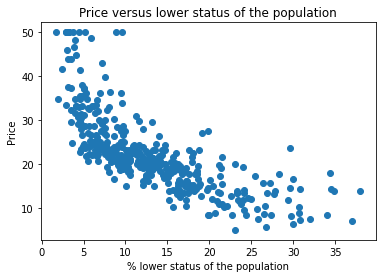

In [11]:
plt.scatter(train_df['LSTAT'],train_df['MEDV'])
plt.title("Price versus lower status of the population")
plt.xlabel("% lower status of the population")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

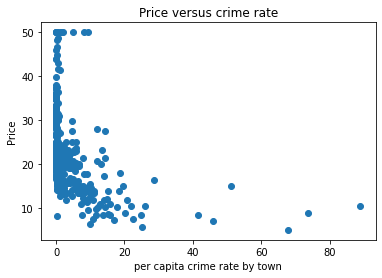

In [12]:
plt.scatter(train_df['CRIM'],train_df['MEDV'])
plt.title("Price versus crime rate")
plt.xlabel("per capita crime rate by town")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

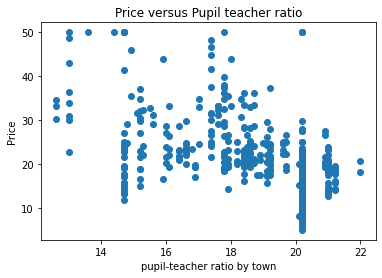

In [13]:
plt.scatter(train_df['PTRATIO'],train_df['MEDV'])
plt.title("Price versus Pupil teacher ratio")
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

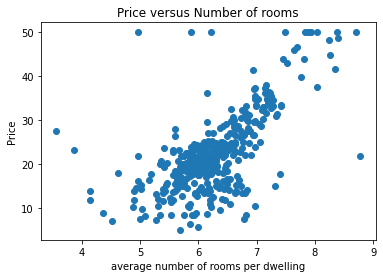

In [14]:
plt.scatter(train_df['RM'],train_df['MEDV'])
plt.title("Price versus Number of rooms")
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Price")

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

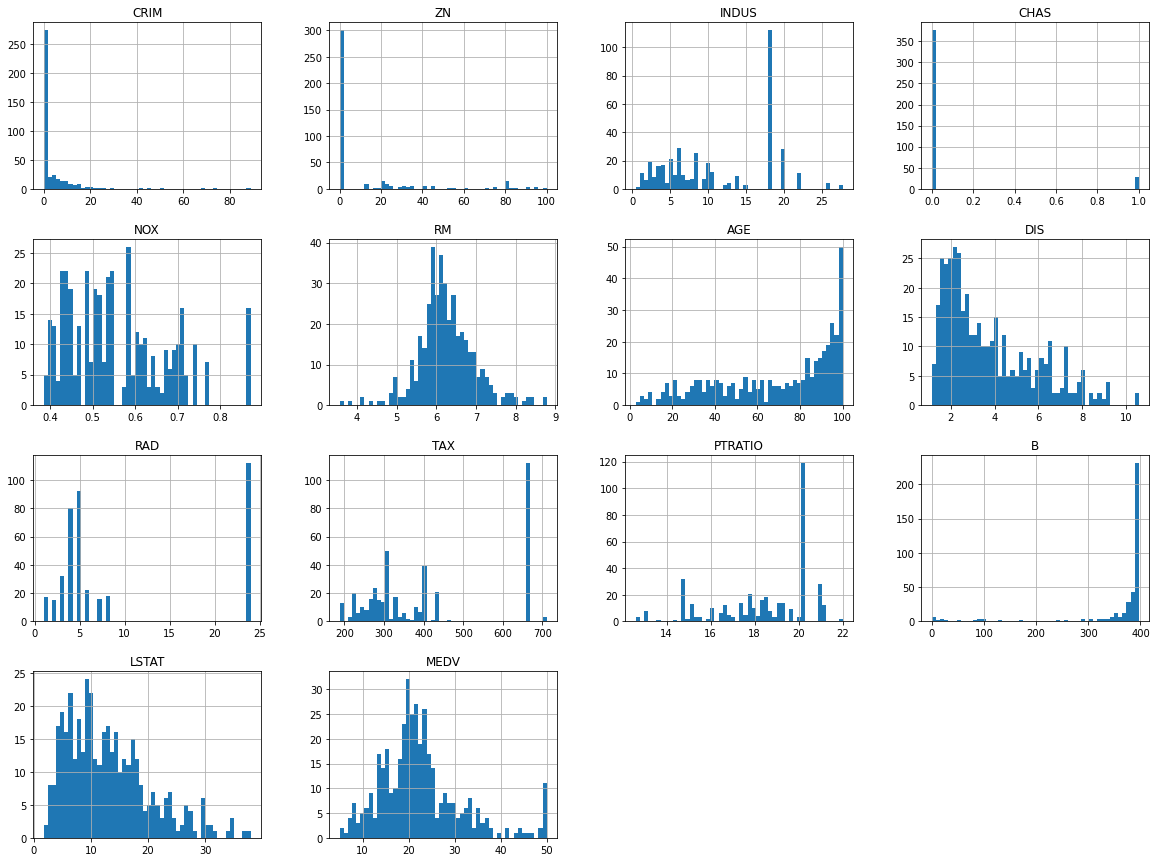

In [15]:
train_df.hist(bins=50,figsize=(20,15))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
import tensorflow as tf 
from tensorflow import keras

In [18]:
model=keras.Sequential()
model.add(keras.layers.Dense(128,input_dim=13,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [19]:
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=100)

Epoch 1/100
11/11 [==============================] - 3s 59ms/step - loss: 577.4279 - mae: 22.1577 - val_loss: 464.4795 - val_mae: 20.2742
Epoch 2/100
11/11 [==============================] - 0s 15ms/step - loss: 513.7119 - mae: 20.7369 - val_loss: 408.7156 - val_mae: 18.8733
Epoch 3/100
11/11 [==============================] - 0s 14ms/step - loss: 443.6324 - mae: 19.0953 - val_loss: 340.1019 - val_mae: 17.0279
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 356.1785 - mae: 16.8458 - val_loss: 256.0035 - val_mae: 14.5047
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 252.8955 - mae: 13.7656 - val_loss: 170.4398 - val_mae: 11.2956
Epoch 6/100
11/11 [==============================] - 0s 14ms/step - loss: 158.9354 - mae: 10.3058 - val_loss: 105.4856 - val_mae: 8.3406
Epoch 7/100
11/11 [==============================] - 0s 15ms/step - loss: 98.0866 - mae: 7.7725 - val_loss: 74.6025 - val_mae: 6.6483
Epoch 8/100
11/11 [====================

Epoch 62/100
11/11 [==============================] - 0s 13ms/step - loss: 11.0286 - mae: 2.3393 - val_loss: 7.6951 - val_mae: 2.1662
Epoch 63/100
11/11 [==============================] - 0s 13ms/step - loss: 10.9641 - mae: 2.3443 - val_loss: 7.7402 - val_mae: 2.1843
Epoch 64/100
11/11 [==============================] - 0s 13ms/step - loss: 10.8268 - mae: 2.3403 - val_loss: 8.0372 - val_mae: 2.2308
Epoch 65/100
11/11 [==============================] - 0s 13ms/step - loss: 11.0804 - mae: 2.4153 - val_loss: 8.5001 - val_mae: 2.2939
Epoch 66/100
11/11 [==============================] - 0s 14ms/step - loss: 11.0076 - mae: 2.4032 - val_loss: 7.8454 - val_mae: 2.1904
Epoch 67/100
11/11 [==============================] - 0s 15ms/step - loss: 10.7939 - mae: 2.3794 - val_loss: 8.2282 - val_mae: 2.2603
Epoch 68/100
11/11 [==============================] - 0s 14ms/step - loss: 10.6481 - mae: 2.3646 - val_loss: 7.6011 - val_mae: 2.1676
Epoch 69/100
11/11 [==============================] - 0s 15ms/

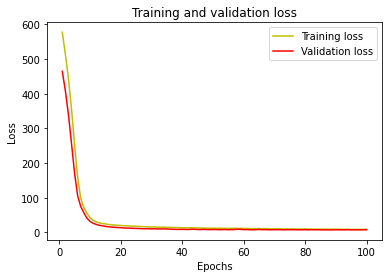

In [21]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

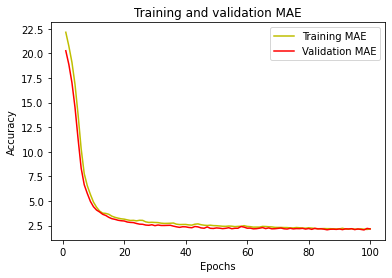

In [24]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", Y_test[:5])

1/1 [==============================] - 0s 56ms/step
Predicted values are:  [[33.711407]
 [23.087101]
 [43.645943]
 [48.58144 ]
 [12.21005 ]]
Real values are:  231    31.7
357    21.7
97     38.7
225    50.0
468    19.1
Name: MEDV, dtype: float64


In [29]:
mse_neural, mae_neural = model.evaluate(X_test, Y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 6ms/step - loss: 9.4858 - mae: 2.2266
Mean squared error from neural net:  9.485821723937988
Mean absolute error from neural net:  2.2265923023223877


In [30]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, Y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
mae_lr = mean_absolute_error(Y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  23.72912565178979
Mean absolute error from linear regression:  3.3883542889113625


In [32]:
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)
y_pred_tree = tree.predict(X_test)
mse_dt = mean_squared_error(Y_test, y_pred_tree)
mae_dt = mean_absolute_error(Y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  23.780882352941177
Mean absolute error using decision tree:  3.3186274509803915


In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train, Y_train)

y_pred_RF = model.predict(X_test)

mse_RF = mean_squared_error(Y_test, y_pred_RF)
mae_RF = mean_absolute_error(Y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean squared error using Random Forest:  11.828811764705884
Mean absolute error Using Random Forest:  2.411372549019608
